# Exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire and Prepare files
import acquire
import prepare

# Prep
from sklearn.model_selection import train_test_split

## Acquire (acquire.py)

### Zillow

#### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.
- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = acquire.zillow_data_query()

#### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,id,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,0,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,1,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,2,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,3,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,1970746,NaN,...,4,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


#### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        223 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   propertylandusetypeid         77580 non-null  float64
 3   heatingorsystemtypeid         49572 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      207 non-null    float64
 6   airconditioningtypeid         25007 non-null  float64
 7   parcelid                      77580 non-null  int64  
 8   id                            77580 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77580 non-null  float64
 11  bedroomcnt                    77580 non-null  float64
 12  buildingqualitytypeid         49810 non-null  float64
 13  c

#### Dtypes

In [5]:
df.dtypes

typeconstructiontypeid    float64
storytypeid               float64
propertylandusetypeid     float64
heatingorsystemtypeid     float64
buildingclasstypeid       float64
                           ...   
buildingclassdesc          object
heatingorsystemdesc        object
propertylandusedesc        object
storydesc                  object
typeconstructiondesc       object
Length: 69, dtype: object

#### Shape

In [6]:
df.shape

(77580, 69)

#### Distributions

In [7]:
df.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,223.000000,50.0,77580.000000,49572.000000,15.000000,207.000000,25007.000000,7.758000e+04,7.758000e+04,50.000000,...,172.0,7.746500e+04,7.757900e+04,77580.0,7.757800e+04,77575.000000,2900.000000,7.733300e+04,77580.000000,77580.000000
mean,6.040359,7.0,261.824465,3.921811,3.933333,7.386473,1.812013,1.300828e+07,1.495404e+06,679.720000,...,1.0,1.892796e+05,4.901476e+05,2016.0,3.011500e+05,5995.927626,14.088276,6.049667e+13,38806.723795,0.016800
std,0.556035,0.0,5.141564,3.594770,0.258199,2.728030,2.965768,3.519376e+06,8.609700e+05,689.703546,...,0.0,2.304095e+05,6.537942e+05,0.0,4.927219e+05,7628.816490,2.181281,1.533329e+12,22403.756329,0.170739
min,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,1.071186e+07,3.490000e+02,38.000000,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420
25%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.153820e+07,7.521430e+05,273.000000,...,1.0,8.417100e+04,2.068990e+05,2016.0,8.529325e+04,2712.650000,14.000000,6.037311e+13,19404.750000,-0.024310
50%,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,1.253056e+07,1.498256e+06,515.000000,...,1.0,1.364020e+05,3.588780e+05,2016.0,2.031810e+05,4448.230000,15.000000,6.037603e+13,38804.500000,0.006675
75%,6.000000,7.0,266.000000,7.000000,4.000000,7.000000,1.000000,1.421135e+07,2.240950e+06,796.500000,...,1.0,2.187340e+05,5.690000e+05,2016.0,3.667398e+05,6926.885000,15.000000,6.059042e+13,58208.250000,0.039291
max,13.000000,7.0,275.000000,24.000000,4.000000,21.000000,13.000000,1.676893e+08,2.982274e+06,3560.000000,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999


#### Value counts

In [8]:
df.bathroomcnt.value_counts().sort_index()

0.0       599
1.0     12945
1.5      1419
2.0     31576
2.5      6607
3.0     17354
3.5      1036
4.0      3356
4.5       696
5.0      1026
5.5       224
6.0       419
6.5        47
7.0       114
7.5        16
8.0       108
8.5         3
9.0        23
10.0        7
11.0        3
13.0        1
18.0        1
Name: bathroomcnt, dtype: int64

#### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.                                                                                                         

In [9]:
# So we are trying to find the number of rows with missing values and the percent of total rows that have missing values

In [10]:
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts.head()

buildingclasstypeid     77565
buildingclassdesc       77565
finishedsquarefeet13    77538
storytypeid             77530
basementsqft            77530
dtype: int64

In [11]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'rows_missing_values': num_missing, 'percent_of_rows_missing_values': pct_missing})
    return cols_missing

In [12]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_of_rows_missing_values", ascending=False, inplace=True)
nulls_by_column.head(10)

,rows_missing_values,percent_of_rows_missing_values
buildingclassdesc,77565,0.999807
buildingclasstypeid,77565,0.999807
finishedsquarefeet13,77538,0.999459
storydesc,77530,0.999356
basementsqft,77530,0.999356
storytypeid,77530,0.999356
yardbuildingsqft26,77510,0.999098
fireplaceflag,77408,0.997783
architecturalstyletypeid,77373,0.997332
architecturalstyledesc,77373,0.997332


#### 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [13]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows_with_n_cols_missing'}).reset_index()
    return rows_missing 

null_rows = nulls_by_row(df)
null_rows.sort_values(by="pct_cols_missing", ascending=False, inplace=True)
null_rows.head(10)

,num_cols_missing,pct_cols_missing,num_rows_with_n_cols_missing
25,48,69.56521739130434,3
24,47,68.11594202898551,3
23,46,66.66666666666666,5
22,45,65.21739130434783,50
21,44,63.76811594202898,79
20,43,62.31884057971014,29
19,42,60.86956521739131,27
18,41,59.42028985507246,29
17,40,57.971014492753625,230
16,39,56.52173913043478,285


## Prepare (prepare.py)

#### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

Keeping:
- 260: residential general
- 261: single family residential
- 262: rural residence
- 279: inferred single family residential

In [14]:
df = df[df.propertylandusetypeid.isin([260, 261, 262, 279])]

In [15]:
# Keeping properties with only positive number of bedrooms and bathrooms
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]
df.shape

(52300, 69)

In [16]:
df.unitcnt.value_counts()

1.0    33783
2.0       28
4.0        3
3.0        1
Name: unitcnt, dtype: int64

In [17]:
df.unitcnt.isnull().sum()

18485

In [18]:
df.unitcnt = df.unitcnt.fillna(1.0)
df.shape

(52300, 69)

In [19]:
# How many unitcounts are not 1?
(df.unitcnt != 1.0).sum()

32

In [20]:
# Filter the duplex, triplex, etc...
df = df[df.unitcnt == 1.0]

#### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
   - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).  
   
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.  
    
- Hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [21]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [22]:
df = handle_missing_values(df)
df.head()

,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,261.0,NaN,14297519,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential
1,261.0,NaN,17052889,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential
2,261.0,NaN,14186244,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential
3,261.0,2.0,12177905,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
6,261.0,2.0,12095076,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Central,Single Family Residential


#### 3. Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [23]:
# Columns to drop
df = df.drop(columns=["propertylandusetypeid", "heatingorsystemtypeid"])

In [24]:
df.isnull().sum().sort_values(ascending=False)

buildingqualitytypeid           18571
propertyzoningdesc              18510
heatingorsystemdesc             18369
regionidcity                     1029
lotsizesquarefeet                 351
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         71
yearbuilt                          40
regionidzip                        23
calculatedbathnbr                  16
fullbathcnt                        16
calculatedfinishedsquarefeet        8
taxamount                           4
landtaxvaluedollarcnt               1
taxvaluedollarcnt                   1
bedroomcnt                          0
latitude                            0
bathroomcnt                         0
fips                                0
id                                  0
propertylandusedesc                 0
longitude                           0
propertycountylandusecode           0
rawcensustractandblock              0
regionidcounty                      0
roomcnt     

In [25]:
df.heatingorsystemdesc.isnull().sum()

18369

In [26]:
df.heatingorsystemdesc.value_counts(dropna=False)

Central       20723
NaN           18369
Floor/Wall    12542
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [27]:
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna("None")

In [28]:
df = df.drop(columns=["propertyzoningdesc"])

In [29]:
(df.calculatedbathnbr == df.bathroomcnt).sum() / len(df)
df = df.drop(columns=["calculatedbathnbr"])

In [30]:
df.isna().sum().sort_values(ascending=False).head(10)

buildingqualitytypeid           18571
regionidcity                     1029
lotsizesquarefeet                 351
finishedsquarefeet12              166
censustractandblock               109
structuretaxvaluedollarcnt         71
yearbuilt                          40
regionidzip                        23
fullbathcnt                        16
calculatedfinishedsquarefeet        8
dtype: int64

In [31]:
df.head()

,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,14297519,1727539,3.5,4.0,NaN,3100.0,3100.0,6059.0,3.0,33634931.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,None,Single Family Residential
1,17052889,1387261,1.0,2.0,NaN,1465.0,1465.0,6111.0,1.0,34449266.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,None,Single Family Residential
2,14186244,11677,2.0,3.0,NaN,1243.0,1243.0,6059.0,2.0,33886168.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,None,Single Family Residential
3,12177905,2288172,3.0,4.0,8.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Central,Single Family Residential
6,12095076,781532,3.0,4.0,9.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Central,Single Family Residential


## Mall Customers

### Notebook (Overview)

1. Acquire data from mall_customers.customers in mysql database.
2. Summarize data (include distributions and descriptive statistics).
3. Detect outliers using IQR.
4. Split data (train, validate, and test split).
5. Encode categorical columns using a one hot encoder.
6. Handles missing values.
7. Scaling

#### 1. Acquire data from mall_customers.customers in mysql database.

In [32]:
df = acquire.new_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### 2. Summarize data (include distributions and descriptive statistics).

In [33]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 3. Detect outliers using IQR.

In [34]:
# age, income, spending score
for col in df.describe().columns:
    q1, q2, q3 = df[col].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    
    print(upper, lower)

299.5 -98.5
79.375 -1.625
132.75 -13.25
130.375 -22.625


##### 4. Split data (train, validate, and test split).

In [35]:
def split_mall_data_test(df):
    train_validate, test = train_test_split(df, test_size=.30, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.20, random_state=123)
    
    # Printing the shape of each dataframe:
    print(f'Shape of train df: {train.shape}')
    print(f'Shape of validate df: {validate.shape}')
    print(f'Shape of test df: {test.shape}')
    return train, validate, test

In [36]:
train, validate, test = split_mall_data_test(df)

Shape of train df: (112, 5)
Shape of validate df: (28, 5)
Shape of test df: (60, 5)


##### 5. Encode categorical columns using a one hot encoder.

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='gender')

In [38]:
train['is_male'] = pd.get_dummies(train.gender, drop_first = True) 

In [39]:
validate['is_male'] = pd.get_dummies(validate.gender, drop_first = True)
test['is_male'] = pd.get_dummies(test.gender, drop_first = True)

validate.shape, test.shape

((28, 6), (60, 6))

In [40]:
ohe

OneHotEncoder(categories='gender', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

##### 6. Handles missing values.

In [41]:
train.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
is_male           0
dtype: int64

In [42]:
# No missing values! Yay!

##### 7. Scaling

In [43]:
import sklearn.preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

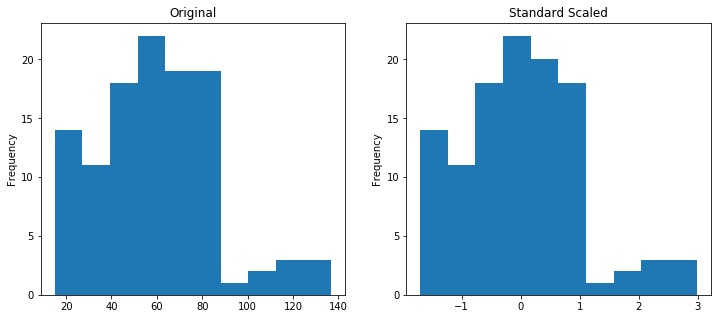

In [44]:
# Annual Income
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['annual_income']])

train['annual_income_scaled'] = scaler.transform(train[['annual_income']])
test['annual_income_scaled'] = scaler.transform(test[['annual_income']])
validate['annual_income_scaled'] = scaler.transform(validate[['annual_income']])

plt.figure(figsize=(12, 5))
plt.subplot(121)
train.annual_income.plot.hist(title='Original')
plt.subplot(122)
train.annual_income_scaled.plot.hist(title='Standard Scaled')

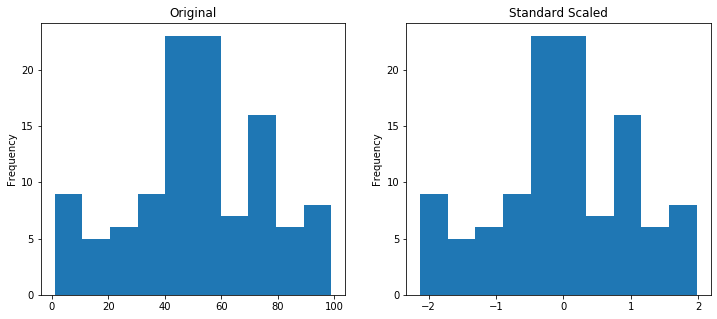

In [45]:
# Spending Score 
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['spending_score']])

train['spending_score_scaled'] = scaler.transform(train[['spending_score']])
test['spending_score_scaled'] = scaler.transform(test[['spending_score']])
validate['spending_score_scaled'] = scaler.transform(validate[['spending_score']])

plt.figure(figsize=(12, 5))
plt.subplot(121)
train.spending_score.plot.hist(title='Original')
plt.subplot(122)
train.spending_score_scaled.plot.hist(title='Standard Scaled')